# Part 1: Network comparision

In [1]:
import networkx as nx
import collections
import matplotlib.pyplot as plt
%run Part-0-CA-Network.ipynb

## Network Structure Analysis

**Exercise 1:**  Generate 3 graphs ( 2 random graphs and 1 real world graph) and study their structures to comment on how closely they reflect a real online social network. (Number of nodes can be assumed to be 4039)


In [2]:
def read_graph(filename):
    G = nx.Graph()
    lines = [line.rstrip('\n') for line in open(filename, 'r')] 
    edge_list=list(map(lambda edge: [int(edge.split()[0]), int(edge.split()[1])], lines))
    G.add_edges_from(edge_list)
    return G

def print_graph_info(graph):
    print("Number of Nodes: ", graph.number_of_nodes())
    print("Number of Edges: ", graph.number_of_edges())
    print("Clustering Coefficient:", round(nx.average_clustering(graph),4))

def plot_graph_degree(graph, plot_title, ax_setting):
    degree_sequence = sorted([d for n, d in graph.degree().items()], reverse=True) 
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    num_nodes = graph.number_of_nodes()
    cnt = [i/num_nodes for i in cnt]
    
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    
    plt.title(plot_title)
    plt.ylabel("p(K)")
    plt.xlabel("K")
    ax.set_xticks(ax_setting)
    ax.set_xticklabels(ax_setting)
    
    # draw graph in inset
    plt.axes([0.4, 0.4, 0.5, 0.5])
    Gcc = sorted(nx.connected_component_subgraphs(graph), key=len, reverse=True)[0]
    pos = nx.spring_layout(graph)
    plt.axis('off')
    nx.draw_networkx_nodes(graph, pos, node_size=1)
    nx.draw_networkx_edges(graph, pos, alpha=0.05)

    plt.show()

## Facebook Network

This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset is available on https://snap.stanford.edu/data/ego-Facebook.html

In [3]:
fb_graph=read_graph("../data/facebook_combined.txt")
print_graph_info(fb_graph)

Number of Nodes:  4039
Number of Edges:  88234
Clustering Coefficient: 0.6055


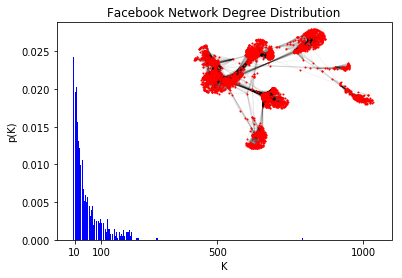

In [4]:
plot_graph_degree(fb_graph, "Facebook Network Degree Distribution",[1000, 500, 100, 10])

## WS Graph

The Watts–Strogatz model is a random graph generation model that produces graphs with small-world properties, including short average path lengths and high clustering.

In [5]:
ws_graph = nx.watts_strogatz_graph(n = 4039, k = 57, p = 0.5)
print_graph_info(ws_graph)

Number of Nodes:  4039
Number of Edges:  113092
Clustering Coefficient: 0.0998


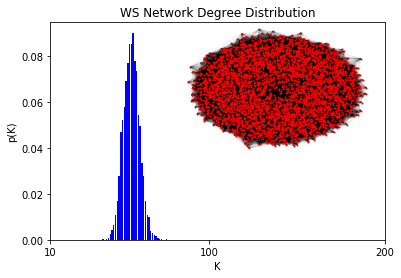

In [6]:
plot_graph_degree(ws_graph, "WS Network Degree Distribution", [200, 100, 10])

## BA Graph

The Barabási Albert (BA) model is an algorithm for generating random scale-free networks using a preferential attachment mechanism. Several natural and human-made systems, including the Internet, the world wide web, citation networks, and some social networks are thought to be approximately scale-free and certainly contain few nodes (called hubs) with unusually high degree as compared to the other nodes of the network. The BA model tries to explain the existence of such nodes in real networks. 

In [7]:
ba_graph = nx.barabasi_albert_graph(n = 4039, m = 6)
print_graph_info(ba_graph)

Number of Nodes:  4039
Number of Edges:  24198
Clustering Coefficient: 0.0162


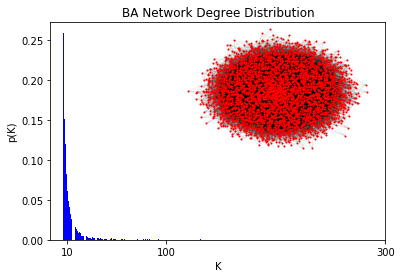

In [8]:
plot_graph_degree(ba_graph, "BA Network Degree Distribution", [300, 100, 10])

On comparing the structure of the three networks, we can see that the Facebook network has the highest the clustering coefficient while the average degree of the Facebook network is larger than that of BA network. On the other hand, the average path of WS small word network is the smallest, and its average degree is the largest, but the degree of all nodes is approximately equal, so it is a uniform network.

In terms of degree distribution, it can be observed from the figure that the degree distribution of the WS small world network obeys Poisson distribution. On the other hand, the degree distribution of the BA network follows the power law distribution while that of the Facebook network the does not strictly obey the power law distribution.

From the above analysis we know, the topological structure and topological properties of online social networks are
different from that of WS small world networks and BA networks. In the ODEs and echo chamber analysis, we will focus on the Facebook social network since there are several inverstigation parameters have been estimated in previous research. In the WS and BA networks, the same way can be applied to estimate their parameters in our simulated models.

## Comparison between graphs

**Exercise 2:**  Support the conclusions that you have drawn in the previous question by simulating the results of the SIR model on the 3 networks and discussing the changes in state of the nodes observed.

In [9]:
facebook = social_network(name ="real",alpha=0.1,beta=0.3)
WS = social_network(name ="ws",alpha=0.1,beta=0.3, n = 4039)
BA = social_network(name ="ba",alpha=0.1,beta=0.3, n = 4039)

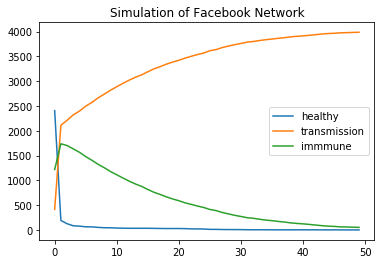

In [10]:
# simulation with the real social network data from facebook
FacebookRecords = plot_simulation(social_network(name ="real",alpha=0.1,beta=0.3), iteration_num = 50)

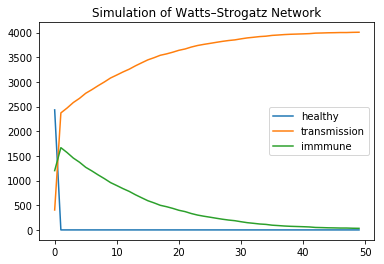

In [11]:
# simulation with a random WS graph
WSrecords = plot_simulation(social_network(name ="ws",alpha=0.1,beta=0.3, n = 4039))

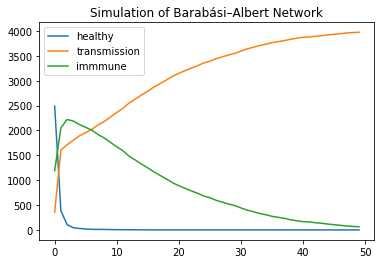

In [12]:
# simulation with a random BA graph
BArecords=plot_simulation(social_network(name ="ba",alpha=0.1,beta=0.3, n = 4039), iteration_num = 50)

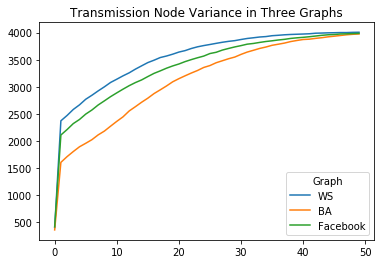

In [13]:
# Transmission Node Variance Comparison between the Three Graphs
iteration_num =50
x=list(range(0,iteration_num))

plt.plot(x, WSrecords[:,1].tolist(),label="WS")
plt.plot(x, BArecords[:,1].tolist(),label="BA")
plt.plot(x, FacebookRecords[:,1].tolist(),label="Facebook")
plt.legend(title="Graph",loc="best")
plt.title("Transmission Node Variance in Three Graphs")

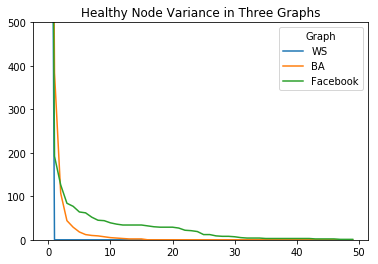

In [14]:
# Healthy Node Variance Comparison between the Three Graphsm
plt.ylim(0, 500)
plt.plot(x, WSrecords[:,0].tolist(),label="WS")
plt.plot(x, BArecords[:,0].tolist(),label="BA")
plt.plot(x, FacebookRecords[:,0].tolist(),label="Facebook")
plt.legend(title="Graph",loc="best")
plt.title("Healthy Node Variance in Three Graphs")

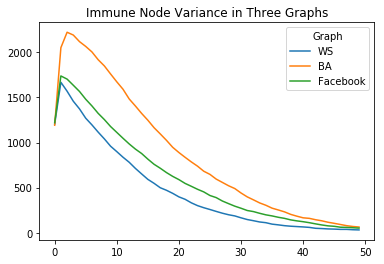

In [15]:
# Immune Node Variance Comparison between the Three Graphs
plt.plot(x, WSrecords[:,2].tolist(),label="WS")
plt.plot(x, BArecords[:,2].tolist(),label="BA")
plt.plot(x, FacebookRecords[:,2].tolist(),label="Facebook")
plt.legend(title="Graph",loc="best")
plt.title("Immune Node Variance in Three Graphs")